### Introdução
Frequentemente, uma dada tarefa demandará a aplicação de várias técnicas de realce comlementares para atingir um resultado aceitável. Com isso, combine diferentes métodos para realçar os detalhes desejaveis na Image 1 obtendo resultados semelhantes ao exemplo no livro.

Deverá ser aplicado o seguinte procedimento:
1. Aplique o operador Laplaciano na Imagem 1 e adicione o resultado do
Laplaciano a Imagem 1.
2. Aplique o gradiente Sobel na Imagem 1.
3. Aplique um filtro de média na imagem resultante da Operação 2.
4. Aplique um produto pixel-to-pixel entre os resultados da Operação 1 e a Operação 3.
5. Somar a imagem original com a resultante da Operação 4.
6. Aplique transformação Gamma no resultado da Operação 5.

Obs: O resultado final deve ser próximo do apresentado na Imagem 2 e envie os resultados intermediáios de cada uma das operações acima.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import urllib.request as ur
from google.colab.patches import cv2_imshow
from google.colab import drive
from matplotlib.pyplot import imshow
import argparse
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


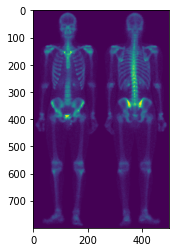

In [ ]:
# Baixar imagem

img1 = cv2.imread('/content/gdrive/My Drive/skeleton.tif',0)
img1 = img1.astype("float")
img1.shape
orig = img1.copy()
%matplotlib inline
imshow(np.asarray(img1))

## Funções Necessárias

In [ ]:

## Filtro de média

def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    index = len(window) // 2
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = sorted(
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data

## Convolução
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))

    print("Kernel Shape : {}".format(kernel.shape))

    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    print("Output Image size : {}".format(output.shape))

    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()

    return output

## Sobel
def sobel(image, filter, verbose=False):
    new_image_x = convolution(image, filter, verbose)
 
    if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()
 
    new_image_y = convolution(image, np.flip(filter.T, axis=0), verbose)
 
    if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()
 
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
 
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
 
    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()
 
    return gradient_magnitude
 

## Filtro para sobel
filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])


# Soma de imagens
def img_sum(im1arr, im2arr):
  im1arrF = im1arr.astype('float')
  im2arrF = im2arr.astype('float')
  additionF = (im1arrF+im2arrF)/2
  addition = additionF#.astype('uint8')
  return addition

# Multiplicar imagens
def img_multiply(im1arr, im2arr):
  im1arrF = im1arr.astype('float')
  im2arrF = im2arr.astype('float')
  multi = (im1arrF*im2arrF)/255
  return multi

## Gamma
def gamma(img,gamma):
  return np.array(255*(img/255)**gamma,dtype='float')


## 1. Aplique o operador Laplaciano na Imagem 1 e adicione o resultado do Laplaciano a Imagem 1

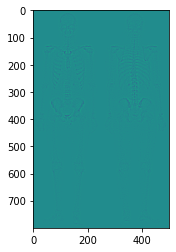

In [ ]:
img_lap = cv2.Laplacian(img1,cv2.CV_64F)
cv2.imwrite("/content/gdrive/My Drive/atv 3/laplace.png", img_lap) 
%matplotlib inline
imshow(np.asarray(img_lap))

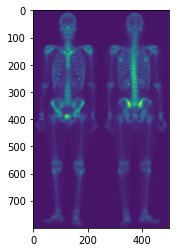

In [ ]:
op_1 = img_sum(img1, img_lap)
cv2.imwrite("/content/gdrive/My Drive/atv 3/op_1.png", op_1) 
%matplotlib inline
imshow(np.asarray(op_1))

## 2. Aplique o gradiente Sobel na Imagem 1.

Image Shape : (800, 500)
Kernel Shape : (3, 3)
Output Image size : (800, 500)
Image Shape : (800, 500)
Kernel Shape : (3, 3)
Output Image size : (800, 500)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


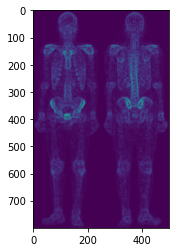

In [ ]:
op_2 = sobel(op_1, filter)
print(op_2)
cv2.imwrite("/content/gdrive/My Drive/atv 3/op_2.png", op_2) 
%matplotlib inline
imshow(np.asarray(op_2))

## 3. Aplique um filtro de média na imagem resultante da Operação 2

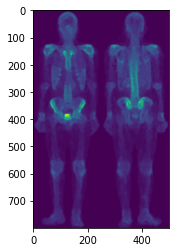

In [ ]:
op_3 = median_filter(op_2, 5)
cv2.imwrite("/content/gdrive/My Drive/atv 3/op_3.png", op_3) 
%matplotlib inline
imshow(np.asarray(op_3))

## 4. Aplique um produto pixel-to-pixel entre os resultados da Operação 1 e a Operação 3.

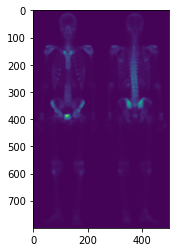

In [ ]:
op_4 = img_multiply(op_1, op_3)
cv2.imwrite("/content/gdrive/My Drive/atv 3/op_4.png", op_4) 
%matplotlib inline
imshow(np.asarray(op_4))

## 5. Somar a imagem original com a resultante da Operação 4.

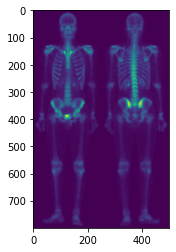

In [ ]:
op_5 = img_sum(orig, op_4)
cv2.imwrite("/content/gdrive/My Drive/atv 3/op_5.png", op_5) 
%matplotlib inline
imshow(np.asarray(op_5))

## 6. Aplique transformação Gamma no resultado da Operação 5.

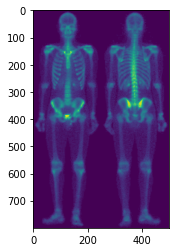

In [ ]:
op_6 = gamma(op_5, 0.7)
cv2.imwrite("/content/gdrive/My Drive/atv 3/op_6.png", op_6) 
%matplotlib inline
imshow(np.asarray(op_6))